In [1]:
import cv2
import sys
import os

In [2]:
import os

In [3]:
print(os.getcwd())

C:\Users\Woj-tek\Desktop\ISA\pojekt_dl


In [4]:
l = list(os.listdir())
print(l)

['.ipynb_checkpoints', 'Cat', 'Cat1', 'Dog', 'Dog1', 'PetImages-checkpoint.ipynb', 'PetImages.ipynb', 'sebastian_wersja1-Copy1.ipynb', 'sebastian_wersja1.ipynb']


In [5]:
data = []
labels = []

In [6]:
path_cat = 'Cat'
path_dog = 'Dog'

In [7]:
cat_images = os.listdir(path_cat)
for image_name in cat_images:
    try:
        image_path = os.path.join(path_cat, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (150, 150))
        image = image.astype('float32') / 255.0
        data.append(image)
        labels.append('cat')
    except:
        pass

In [8]:
dog_images = os.listdir(path_dog)
for image_name in dog_images:
    try:
        image_path = os.path.join(path_dog, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (150, 150))
        image = image.astype('float32') / 255.0
        data.append(image)
        labels.append('dog')
    except:
        pass

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [10]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

19956
4990
19956
4990


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

In [15]:
# Dodawanie warstw gęstych
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Warstwa wyjściowa z dwoma neuronami (kot i pies)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 144, 144, 128)     73856     
                                                                 
 flatten (Flatten)           (None, 2654208)           0         
                                                                 
 dense (Dense)               (None, 64)                169869376 
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 6

In [18]:
results = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
624/624 [==============================] - 2784s 4s/step - loss: 0.6757 - accuracy: 0.6403 - val_loss: 0.6065 - val_accuracy: 0.6741
Epoch 2/20
624/624 [==============================] - 2667s 4s/step - loss: 0.5041 - accuracy: 0.7545 - val_loss: 0.5080 - val_accuracy: 0.7495
Epoch 3/20
624/624 [==============================] - 2548s 4s/step - loss: 0.3213 - accuracy: 0.8602 - val_loss: 0.5859 - val_accuracy: 0.7529
Epoch 4/20
624/624 [==============================] - 2539s 4s/step - loss: 0.1323 - accuracy: 0.9496 - val_loss: 0.9248 - val_accuracy: 0.7339
Epoch 5/20
624/624 [==============================] - 2527s 4s/step - loss: 0.0548 - accuracy: 0.9821 - val_loss: 1.1118 - val_accuracy: 0.7353
Epoch 6/20
624/624 [==============================] - 2537s 4s/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 1.6100 - val_accuracy: 0.7311
Epoch 7/20
624/624 [==============================] - 2544s 4s/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 1.6668 - val_accuracy:

In [19]:
print(classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

156/156 [==============================] - 116s 743ms/step
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2547
           1       0.72      0.73      0.73      2443

    accuracy                           0.73      4990
   macro avg       0.73      0.73      0.73      4990
weighted avg       0.73      0.73      0.73      4990



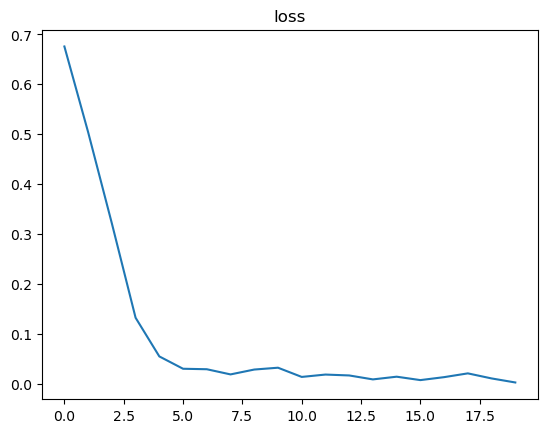

In [20]:
plt.plot(results.history["loss"])
plt.title("loss")
plt.show()

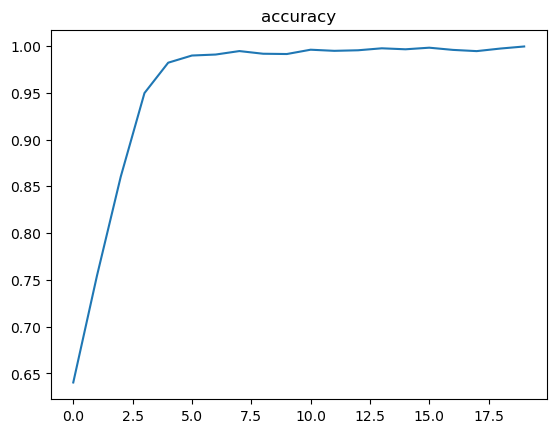

In [21]:
plt.plot(results.history["accuracy"])
plt.title("accuracy")
plt.show()